sources:

[Siamese Neural Network Keras](https://keras.io/examples/vision/siamese_network/) <br>
[Siamese Neural Network Keras](https://keras.io/examples/vision/siamese_network/) <br>
[Triplet Loss](https://github.com/Ekeany/Siamese-Network-with-Triplet-Loss) <br>
[Auto Encoder](https://blog.keras.io/building-autoencoders-in-keras.html)<br>
[Stacked AutoEncoder](https://www.youtube.com/watch?v=PWdBDostVqo&ab_channel=NonoMart%C3%ADnezAlonso) <br>
[Data Preprocessing](https://medium.com/@sahoo.puspanjali58/a-beginners-guide-to-build-stacked-autoencoder-and-tying-weights-with-it-9daee61eab2b)<br>
[More Sources](https://github.com/nikola310/Siamese-Neural-Networks/blob/master/Koch%20network/siamese_network.py)<br>
[One Shot Image recognition with Siamese Neural network and PCA](https://github.com/Ekeany/Siamese-Network-with-Triplet-Loss)<br>
[Auto encoders tutorial](https://stackabuse.com/autoencoders-for-image-reconstruction-in-python-and-keras/)<br>

In [ ]:
#import imageio
import glob
import os
import time
import cv2
import tensorflow as tf
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tensorflow import keras
from pathlib import Path
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import random

In [310]:
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import applications
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics
from tensorflow.keras import Model
from keras.preprocessing import image


target_shape = (50, 50)

In [277]:
X_data = []
files = glob.glob (r"C:\Users\rahul\Videos\AutoEncoder\left\*.jpg")
for myFile in files:
    #img = image.load_img(myFile, target_size=(80, 80,3))
    #img = image.img_to_array(img)
    #img = img/255
    img = cv2.imread(myFile)
    img = cv2.resize(img, target_shape)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    X_data.append(img)

In [278]:
Y_data = []
files = glob.glob (r"C:\Users\rahul\Videos\AutoEncoder\right\*.jpg")
for myFile in files:
    #print(myFile)
    #img = image.load_img(myFile, target_size=(80, 80,3))
    #img = image.img_to_array(img)
    #img = img/255
    img = cv2.imread(myFile)
    img = cv2.resize(img, target_shape)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    Y_data.append(img)

In [279]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """
    #array = cv2.imread(array)
    array = np.array(array)
    array = array.astype("float32") / 255.0
    #array = np.reshape(array, (len(array), 28, 28, 3))
    return array

In [280]:
left_image = preprocess(X_data)
right_image = preprocess(Y_data)

In [281]:
X_train_l, X_test_l = train_test_split(left_image, test_size=0.1, random_state=42)

X_train_r, X_test_r = train_test_split(right_image, test_size=0.1, random_state=42)

In [282]:
import matplotlib.pyplot as plt
def show_image(x):
    plt.imshow(x)
    
#show_image(X_data[5])
#show_image(Y_data[5])

In [283]:
img_shape = X_train_l[1].shape

In [284]:
stacked_encoder = tf.keras.models.Sequential([
    #inputs = keras.Input(shape=(50, 50, 3))
    tf.keras.layers.Flatten(input_shape=[50, 50, 3]),
    tf.keras.layers.Dense(3750, activation="relu"),
    tf.keras.layers.Dense(1875, activation="relu"),
    ])
stacked_encoder

In [285]:
stacked_decoder = tf.keras.models.Sequential([
    #inputs = keras.Input(shape=(50, 50, 3))
    tf.keras.layers.Dense(3750, activation="relu"),
    tf.keras.layers.Dense(50*50*3, activation="sigmoid"),
    tf.keras.layers.Reshape([50, 50, 3])
    ])
stacked_decoder

In [286]:
stacker_auto = tf.keras.models.Sequential(
    [
        stacked_encoder,
        stacked_decoder
    ]
)
stacker_auto

In [287]:
def rounded_accuracy(y_true, y_pred):
    return tf.keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [288]:
stacker_auto.compile(
    loss = "binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    #metrics=[rounded_accuracy]
)

In [289]:
stacker_auto.layers[0].input

<KerasTensor: shape=(None, 50, 50, 3) dtype=float32 (created by layer 'flatten_25_input')>

In [290]:
stacker_auto.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_28 (Sequential)  (None, 1875)              35161875  
                                                                 
 sequential_29 (Sequential)  (None, 50, 50, 3)         35167500  
                                                                 
Total params: 70,329,375
Trainable params: 70,329,375
Non-trainable params: 0
_________________________________________________________________


In [291]:
h_stack = stacker_auto.fit(X_test_l, X_test_l, epochs=50, batch_size=20,
                validation_data=[X_test_l, X_test_l])

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.6959 - val_loss: 0.6629
Epoch 2/50
1/1 [==============================] - 1s 804ms/step - loss: 0.6629 - val_loss: 0.6987
Epoch 3/50
1/1 [==============================] - 1s 602ms/step - loss: 0.6987 - val_loss: 0.6535
Epoch 4/50
1/1 [==============================] - 1s 666ms/step - loss: 0.6535 - val_loss: 0.6361
Epoch 5/50
1/1 [==============================] - 1s 657ms/step - loss: 0.6361 - val_loss: 0.6044
Epoch 6/50
1/1 [==============================] - 1s 656ms/step - loss: 0.6044 - val_loss: 0.5657
Epoch 7/50
1/1 [==============================] - 1s 612ms/step - loss: 0.5657 - val_loss: 0.5546
Epoch 8/50
1/1 [==============================] - 1s 699ms/step - loss: 0.5546 - val_loss: 0.5379
Epoch 9/50
1/1 [==============================] - 1s 715ms/step - loss: 0.5379 - val_loss: 0.5263
Epoch 10/50
1/1 [==============================] - 1s 669ms/step - loss: 0.5263 - val_loss: 0.5158
Epoch 11/50
1/1 [=====

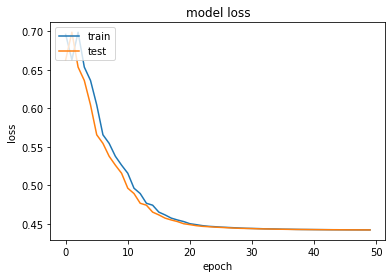

In [292]:
#h_stack
plt.plot(h_stack.history['loss'])
plt.plot(h_stack.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

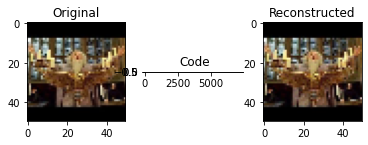

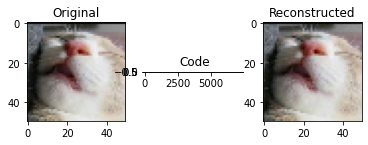

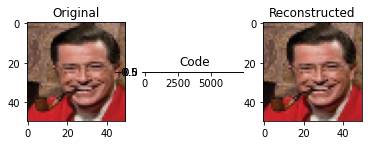

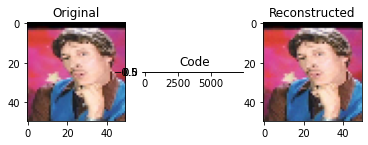

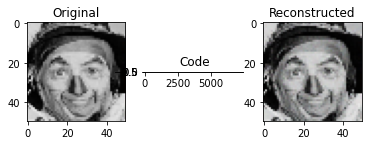

In [293]:
def visualize(img, decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = decoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

for i in range(5):
    img = X_test_l[i]
    visualize(img,stacker_auto)


In [294]:
h_stack_t = stacker_auto.fit(X_test_r, X_test_r, epochs=50, batch_size=20,
                validation_data=[X_test_r, X_test_r])

Epoch 1/50
1/1 [==============================] - 1s 832ms/step - loss: 0.7085 - val_loss: 0.7011
Epoch 2/50
1/1 [==============================] - 1s 597ms/step - loss: 0.7011 - val_loss: 0.7033
Epoch 3/50
1/1 [==============================] - 1s 659ms/step - loss: 0.7033 - val_loss: 0.6892
Epoch 4/50
1/1 [==============================] - 1s 720ms/step - loss: 0.6892 - val_loss: 0.6865
Epoch 5/50
1/1 [==============================] - 1s 763ms/step - loss: 0.6865 - val_loss: 0.6807
Epoch 6/50
1/1 [==============================] - 1s 698ms/step - loss: 0.6807 - val_loss: 0.6721
Epoch 7/50
1/1 [==============================] - 1s 726ms/step - loss: 0.6721 - val_loss: 0.6609
Epoch 8/50
1/1 [==============================] - 1s 745ms/step - loss: 0.6609 - val_loss: 0.6545
Epoch 9/50
1/1 [==============================] - 1s 720ms/step - loss: 0.6545 - val_loss: 0.6573
Epoch 10/50
1/1 [==============================] - 1s 794ms/step - loss: 0.6573 - val_loss: 0.6400
Epoch 11/50
1/1 [==

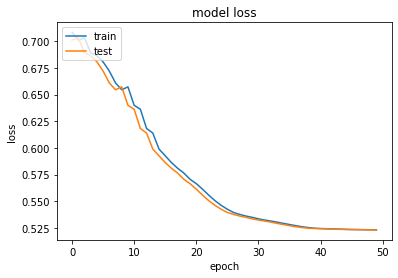

In [295]:
#h_stack
plt.plot(h_stack_t.history['loss'])
plt.plot(h_stack_t.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

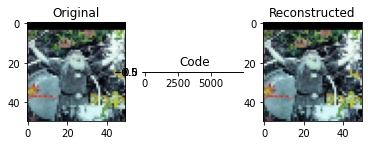

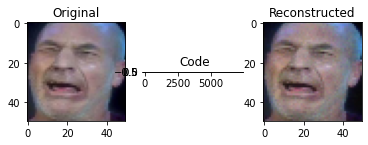

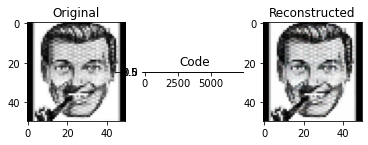

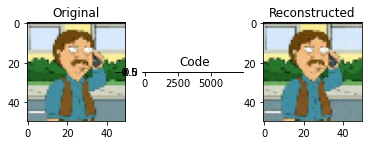

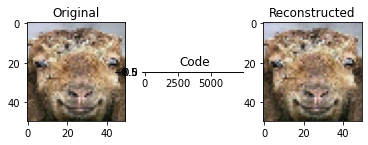

In [296]:
def visualize(img, decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = decoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()

for i in range(5):
    img = X_test_r[i]
    visualize(img,stacker_auto)


In [297]:
data_dir = Path(r'C:\Users\rahul\Videos\AutoEncoder')
left = sorted(data_dir.glob('left/*.jpg'))
right = sorted(data_dir.glob('right/*.jpg'))

In [298]:
def preprocess_image(filename):
    """
    Load the specified file as a JPEG image, preprocess it and
    resize it to the target shape.
    """

    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, target_shape)
    return image


def preprocess_triplets(anchor, positive, negative):
    """
    Given the filenames corresponding to the three images, load and
    preprocess them.
    """

    return (
        preprocess_image(anchor),
        preprocess_image(positive),
        preprocess_image(negative),
    )

In [299]:
left_img=[]
for fname in left:
    left_img.append(str(fname))
    
right_img=[]
for fname in right:
    right_img.append(str(fname))

In [300]:
anchor_images = left_img

positive_images = right_img

image_count = len(anchor_images)

anchor_dataset = tf.data.Dataset.from_tensor_slices(anchor_images)
positive_dataset = tf.data.Dataset.from_tensor_slices(positive_images)

# To generate the list of negative images, let's randomize the list of
# available images and concatenate them together.
rng = np.random.RandomState(seed=42)
rng.shuffle(anchor_images)
rng.shuffle(positive_images)

negative_images = anchor_images + positive_images
np.random.RandomState(seed=32).shuffle(negative_images)

negative_dataset = tf.data.Dataset.from_tensor_slices(negative_images)
negative_dataset = negative_dataset.shuffle(buffer_size=4096)

dataset = tf.data.Dataset.zip((anchor_dataset, positive_dataset, negative_dataset))
dataset = dataset.shuffle(buffer_size=1024)
dataset = dataset.map(preprocess_triplets)

# Let's now split our dataset in train and validation.
train_dataset = dataset.take(round(image_count * 0.8))
val_dataset = dataset.skip(round(image_count * 0.8))

train_dataset = train_dataset.batch(32, drop_remainder=False)
train_dataset = train_dataset.prefetch(8)

val_dataset = val_dataset.batch(32, drop_remainder=False)
val_dataset = val_dataset.prefetch(8)

In [307]:
embedding = Model(stacker_auto.input, stacker_auto.output, name="Embedding")

In [311]:
class DistanceLayer(layers.Layer):
    """
    This layer is responsible for computing the distance between the anchor
    embedding and the positive embedding, and the anchor embedding and the
    negative embedding.
    """

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, anchor, positive, negative):
        ap_distance = tf.reduce_sum(tf.square(anchor - positive), -1)
        an_distance = tf.reduce_sum(tf.square(anchor - negative), -1)
        return (ap_distance, an_distance)


anchor_input = layers.Input(name="anchor", shape=target_shape + (3,))
positive_input = layers.Input(name="positive", shape=target_shape + (3,))
negative_input = layers.Input(name="negative", shape=target_shape + (3,))

distances = DistanceLayer()(
    embedding(anchor_input),
    embedding(positive_input),
    embedding(negative_input),
)

siamese_network = Model(
    inputs=[anchor_input, positive_input, negative_input], outputs=distances
)

In [312]:
class SiameseModel(Model):
    """The Siamese Network model with a custom training and testing loops.

    Computes the triplet loss using the three embeddings produced by the
    Siamese Network.

    The triplet loss is defined as:
       L(A, P, N) = max(‖f(A) - f(P)‖² - ‖f(A) - f(N)‖² + margin, 0)
    """

    def __init__(self, siamese_network, margin=0.5):
        super(SiameseModel, self).__init__()
        self.siamese_network = siamese_network
        self.margin = margin
        self.loss_tracker = metrics.Mean(name="loss")

    def call(self, inputs):
        return self.siamese_network(inputs)

    def train_step(self, data):
        # GradientTape is a context manager that records every operation that
        # you do inside. We are using it here to compute the loss so we can get
        # the gradients and apply them using the optimizer specified in
        # `compile()`.
        with tf.GradientTape() as tape:
            loss = self._compute_loss(data)

        # Storing the gradients of the loss function with respect to the
        # weights/parameters.
        gradients = tape.gradient(loss, self.siamese_network.trainable_weights)

        # Applying the gradients on the model using the specified optimizer
        self.optimizer.apply_gradients(
            zip(gradients, self.siamese_network.trainable_weights)
        )

        # Let's update and return the training loss metric.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def test_step(self, data):
        loss = self._compute_loss(data)

        # Let's update and return the loss metric.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def _compute_loss(self, data):
        # The output of the network is a tuple containing the distances
        # between the anchor and the positive example, and the anchor and
        # the negative example.
        ap_distance, an_distance = self.siamese_network(data)

        # Computing the Triplet Loss by subtracting both distances and
        # making sure we don't get a negative value.
        loss = ap_distance - an_distance
        loss = tf.maximum(loss + self.margin, 0.0)
        return loss

    @property
    def metrics(self):
        # We need to list our metrics here so the `reset_states()` can be
        # called automatically.
        return [self.loss_tracker]

In [313]:
siamese_model = SiameseModel(siamese_network)
siamese_model.compile(optimizer=optimizers.Adam(0.0001))
siamese_model.fit(train_dataset, epochs=10, validation_data=val_dataset)

Epoch 1/10
2/2 [==============================] - 5s 2s/step - loss: 0.4786 - val_loss: 0.5640
Epoch 2/10
2/2 [==============================] - 3s 1s/step - loss: 0.4675 - val_loss: 0.5137
Epoch 3/10
2/2 [==============================] - 2s 1s/step - loss: 0.4757 - val_loss: 0.5203
Epoch 4/10
2/2 [==============================] - 3s 1s/step - loss: 0.4454 - val_loss: 0.5064
Epoch 5/10
2/2 [==============================] - 3s 1s/step - loss: 0.4912 - val_loss: 0.4272
Epoch 6/10
2/2 [==============================] - 3s 1s/step - loss: 0.4744 - val_loss: 0.4225
Epoch 7/10
2/2 [==============================] - 3s 1s/step - loss: 0.4450 - val_loss: 0.4799
Epoch 8/10
2/2 [==============================] - 3s 2s/step - loss: 0.4512 - val_loss: 0.4421
Epoch 9/10
2/2 [==============================] - 2s 1s/step - loss: 0.4434 - val_loss: 0.5201
Epoch 10/10
2/2 [==============================] - 3s 2s/step - loss: 0.4282 - val_loss: 0.4413


In [316]:
def visualize(anchor, positive, negative):
    """Visualize a few triplets from the supplied batches."""

    def show(ax, image):
        ax.imshow(image)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    fig = plt.figure(figsize=(9, 9))

    axs = fig.subplots(3, 3)
    for i in range(3):
        show(axs[i, 0], anchor[i])
        show(axs[i, 1], positive[i])
        show(axs[i, 2], negative[i])



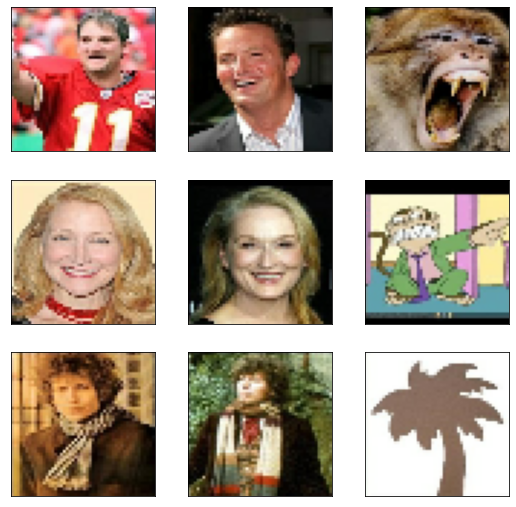

In [317]:
sample = next(iter(train_dataset))
visualize(*sample)

anchor, positive, negative = sample
anchor_embedding, positive_embedding, negative_embedding = (
    embedding(anchor),
    embedding(positive),
    embedding(negative),
)

In [318]:
cosine_similarity = metrics.CosineSimilarity()

positive_similarity = cosine_similarity(anchor_embedding, positive_embedding)
print("Positive similarity:", positive_similarity.numpy())

negative_similarity = cosine_similarity(anchor_embedding, negative_embedding)
print("Negative similarity", negative_similarity.numpy())

Positive similarity: 0.9770698
Negative similarity 0.96927756
